# Preprocessing Data

We will be using the [Rotten Tomatoes movie reviews dataset](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data).

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os

api = KaggleApi()
api.authenticate()

for file in ['train.tsv', 'test.tsv']:
    api.competition_download_file('sentiment-analysis-on-movie-reviews', f'{file}.zip', path='./')

    with zipfile.ZipFile(f'{file}.zip', 'r') as zip_ref:
        zip_ref.extractall('./')

    os.remove(f'{file}.zip')

100%|█████████████████████████████████████████████████████████████████████████████| 1.28M/1.28M [00:00<00:00, 7.44MB/s]


100%|███████████████████████████████████████████████████████████████████████████████| 494k/494k [00:00<00:00, 17.0MB/s]

---

## Preparing Data

We will start by reading the data into a Pandas Dataframe using th `read_csv` function. Because we're working with *.tsv* (*tab seperate values*) files we need to specify that we will be taking tab characters as the delimiters:

In [2]:
import pandas as pd

df = pd.read_csv('train.tsv', sep='\t')
df.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

The *Phrase* column contains all of our text data that we will be processing. We can also see that there are many copies through *segments* of the same answer (note that the *SentenceId* value for each of these copies is identical). We can reduce the amount of noise in our dataset by removing these duplicates.

In [3]:
#df = df.drop_duplicates(subset=['SentenceId'], keep='first')

df.head()

PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

Let's check the distribution of sentiment classes across our data.

<AxesSubplot:>

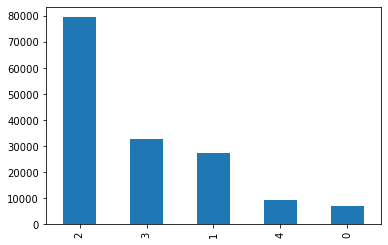

In [4]:
df['Sentiment'].value_counts().plot(kind='bar')

We will be tokenizing this text to create two input tensors; our input IDs, and attention mask.

We will contain our tensors within two numpy arrays, which will be of dimensions `len(df) * 512` - the `512` is the sequence length of our tokenized sequences for BERT, and `len(df)` the number of samples in our dataset.

In [5]:
import numpy as np

seq_len = 512
num_samples = len(df)

num_samples, seq_len

(156060, 512)

Now we can begin tokenizing with a `BertTokenizer`, like so:

In [6]:
from transformers import BertTokenizer

# initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# tokenize - this time returning Numpy tensors
tokens = tokenizer(df['Phrase'].tolist(), max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensor='np')

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword arguments {'return_tensor': 'np'} not recognized.
Keyword argume

Which returns us three numpy arrays - *input_ids*, *token_type_ids*, and *attention_mask*.

In [7]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
tokens['input_ids']

In [ ]:
tokens['attention_mask']

And now we save them to file as Numpy binary files:

In [ ]:
with open('movie-xids.npy', 'wb') as f:
    np.save(f, tokens['input_ids'])
with open('movie-xmask.npy', 'wb') as f:
    np.save(f, tokens['attention_mask'])

Now that we have them on file, we can delete the in-memory arrays to free up memory.

In [ ]:
del tokens

Our input tensors are prepared, but we haven't touched our target data yet. So, let's move onto that.

Presently our target data is a set of integer values (representing sentiment classes) in the *Sentiment* column of our dataframe `df`. We need to extract these values and *one-hot* encode them into another numpy array, which will have the dimensions `len(df) * number of label classes`. Again, we will initialize a numpy zero array beforehand, but we won't populate it row by row - we will use some fancy indexing techniques instead.

In [ ]:
# first extract sentiment column
arr = df['Sentiment'].values

In [ ]:
# we then initialize the zero array
labels = np.zeros((num_samples, arr.max()+1))
labels.shape

We are able to use `arr.max()+1` to define our second dimension here because we have the values *\[0, 1, 2, 3, 4\]* in our *Sentiment* column, there are **five** unique labels which means we need our labels array to have five columns (one for each) - `arr.max() = 4`, so we do `4 + 1` to get our required value of `5`.

Now we use the current values in our `arr` of *\[0, 1, 2, 3, 4\]* to place `1` values in the correct positions of our presently zeros-only array:

In [ ]:
labels[np.arange(num_samples), arr] = 1

labels

And there is our one-hot encoded labels array. Just like before, we save this to file as a Numpy binary file.

In [ ]:
with open('movie-labels.npy', 'wb') as f:
    np.save(f, labels)